In [3]:
import sys
import os
import time
from pathlib import Path
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import math
import matplotlib.pyplot as plt
from IPython.display import Image as display_image
from IPython.display import display
from IPython.display import display, clear_output
from matplotlib.pyplot import imshow
import ipywidgets as widgets
import matplotlib.image as mpimg
import time

import re
import cv2

from keras.models import Model
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
from keras.callbacks import CSVLogger, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, TensorBoard
from keras import backend as K

from keras.preprocessing import image
from keras.models import Model
from keras import layers
from keras import Input
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

#%load_ext autoreload
#%autoreload 2
pd.options.display.max_columns = 999
%matplotlib inline

Using TensorFlow backend.


In [6]:
model_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg')

for layer in model_resnet.layers[:-12]:
    # 6 - 12 - 18 have been tried. 12 is the best.
    layer.trainable = False
    
x = model_resnet.output
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
y = Dense(46, activation='softmax', name='img')(x)

x_bbox = model_resnet.output
x_bbox = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x_bbox)
x_bbox = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x_bbox)
bbox = Dense(4, kernel_initializer='normal', name='bbox')(x_bbox)

model = Model(inputs=model_resnet.input,
                    outputs=[y, bbox])

In [5]:
model.load_weights('/home/ec2-user/GitHub/deepfashion_keras/models/model_10_epoch.h5')

In [60]:
#model.summary()

In [8]:
model.layers.pop()

In [9]:
model.layers.pop()

In [10]:
model.layers.pop()

In [34]:
model.layers.pop()

In [36]:
model.layers.pop()

In [38]:
model.layers[-1].output

<tf.Tensor 'global_average_pooling2d_2/Mean:0' shape=(?, 2048) dtype=float32>

In [39]:
model_no_top = Model(model.input, model.layers[-1].output)

In [1]:
img_dir = '/ebsvol2/data/insta_scrape/results/images'

In [8]:
user_img_names
for user_img_folder in  [f for f in os.listdir(img_dir)]:
    user_img_names = [f for f in os.listdir(user_img_folder)]
    
df = pd.DataFrame({'path':file_names})

vintagepolorl
90sbabbyyy_vintage
a_lot_of_vintage_shop
1993vintage


In [7]:
file_names

['vintagepolorl', '90sbabbyyy_vintage', 'a_lot_of_vintage_shop', '1993vintage']

In [6]:
len(df)

4

In [40]:
pred_datagen = ImageDataGenerator()

pred_generator = pred_datagen.flow_from_directory(
        img_dir,
        target_size=(200, 200),
        batch_size=32,
        classes=['test'],  # only data, no labels
        shuffle=False)  # keep data in same order as labels

Found 18652 images belonging to 1 classes.


In [29]:
18652/32

582.875

In [41]:
probabilities = model_no_top.predict_generator(pred_generator, 583)

In [58]:
len(probabilities)

18652

In [42]:
np.shape(probabilities[0])

(2048,)

In [44]:
def plotClusters(embeddings, clust_labels):
    pca = PCA(n_components=2)

    embed_reduced = pca.fit_transform(embeddings).tolist()

    plot_dat = pd.DataFrame(embed_reduced, columns=['comp_1','comp_2'])

    plot_dat['Label'] = clust_labels

    plt.scatter(plot_dat['comp_1'], plot_dat['comp_2'], c=plot_dat['Label'])

    plt.show()

2


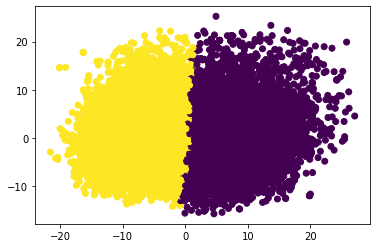

3


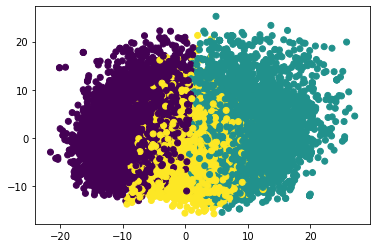

4


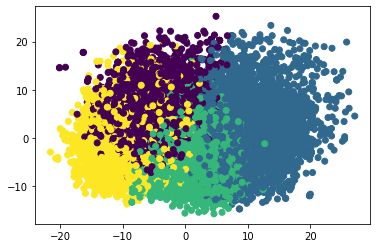

In [45]:
for i in range(2,5):
    kmeans = KMeans(n_clusters=i, random_state=0)
    km = kmeans.fit_transform(probabilities)
    print(i)
    plotClusters(probabilities, kmeans.labels_.tolist())

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0)

km = kmeans.fit_transform(probabilities)

clust_labels = kmeans.labels_.tolist()

centers = np.array(kmeans.cluster_centers_)

In [49]:
top_clust_0 = (clust_dat[clust_dat.Cluster == 0].sort_values(by='dist_to_cent'))[:20]

NameError: name 'clust_dat' is not defined

In [55]:
file_names = [f for f in os.listdir(img_dir+ '/test')]

df = pd.DataFrame({'path':file_names})

In [64]:
from os import listdir
from os.path import isfile, join

[f for f in listdir(img_dir) if isfile(join(img_dir, f))]

['1993vintage.json', 'a_lot_of_vintage_shop.json', 'vintagepolorl.json']